<h1>Import the necessary Libaries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import xgboost
from sklearn.metrics import mean_squared_error,r2_score
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#from catboost import CatBoostRegressor
#import lightgbm as lgb
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy import stats
import statsmodels
#from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from collections import OrderedDict
import rfpimp
import xgboost as xgb
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
missing_values=['',' ','Na','Nan','nan',-999,'-999','-999.25',-999.25]
well1=pd.read_csv(r'..\data\wella.csv', na_values=missing_values)

well2=pd.read_csv(r'..\data\\wellea.csv', na_values=missing_values)


,Total,Percent
sonic,9689,73.854715
nphi,5604,42.716670
density,5512,42.015398
cali,5512,42.015398
res,3129,23.850903
gr,0,0.000000
depth,0,0.000000


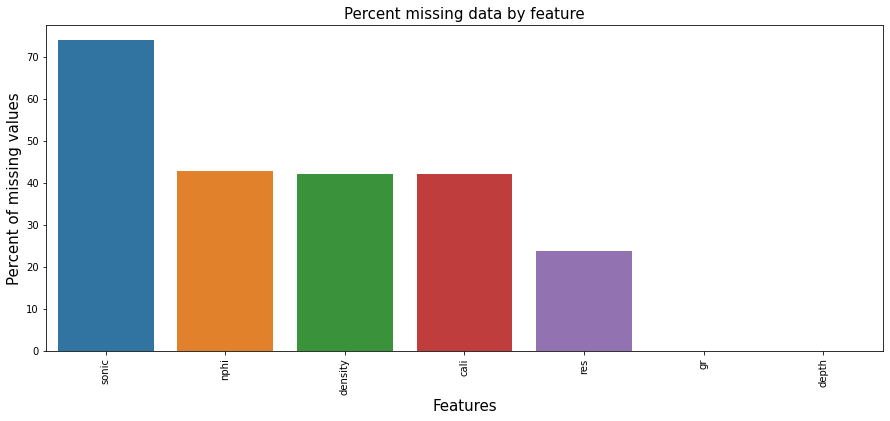

In [3]:
data=well2
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percent=100*percent
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [4]:
list1=[well1]
for i in list1:
    i.fillna(0,inplace=True)
well2.dropna(inplace=True) # the missing values are dropped in well2 to ensure the metrics is not skewed
well2a=well2.copy()


In [5]:
x,y=['depth', 'cali', 'gr', 'density', 'nphi', 'res'],['sonic']
#well1[x]=(well1[x]-well1[x].mean())/well1[x].std()
#well2[x]=(well2[x]-well2[x].mean())/well2[x].std()
trainx,trainy=np.log1p(well1[x]),np.log1p(well1[y])
testx,testy=np.log1p(well2[x]),np.log1p(well2[y])

In [6]:
#scaling the variables for easy fitting with the algorithms
x,y=['depth', 'cali', 'gr', 'density', 'nphi', 'res'],['sonic']
well1[x]=(well1[x]-well1[x].mean())/well1[x].std()
well2[x]=(well2[x]-well2[x].mean())/well2[x].std()
trainx,trainy=well1[x],np.log1p(well1[y])
testx,testy=well2[x],np.log1p(well2[y])

<h1>Linear models</h1>
<p>Linear Regression (OLS)</p>
<p>Ridge</p>
<p>SGDRegressor</p>
<p>Lasso</p>

In [12]:
#OLS
np.random.seed(34)
lr=LinearRegression().fit(trainx,trainy)
predict=lr.predict(testx)
print(np.sqrt(mean_squared_error(predict,testy)))
# lr.score(testx,testy)

0.15965412459078934


In [13]:
#SGDRegressor
np.random.seed(34)
Slr=SGDRegressor(alpha=0.01).fit(trainx,trainy)
predict=Slr.predict(testx)
print(np.sqrt(mean_squared_error(predict,testy)))
# Slr.score(testx,testy)

0.14592412140829514


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [18]:
##Ridge
np.random.seed(34)
Rlr=Ridge(alpha=100).fit(trainx,trainy)
predict=Rlr.predict(testx)
print(np.sqrt(mean_squared_error(predict,testy)))
# Rlr.score(testx,testy)

0.14754204546155159


In [27]:
##Lasso
np.random.seed(34)
Llr=Lasso(alpha=0.01).fit(trainx,trainy)
lpredict=Llr.predict(testx)
print(np.sqrt(mean_squared_error(lpredict,testy)))
# Llr.score(testx,testy)

0.15126117196287545


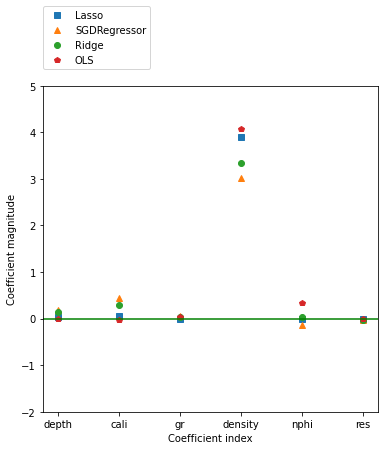

In [62]:

fig,ax=plt.subplots(figsize=(6,6))
ax.plot(Llr.coef_, 's' ,label="Lasso")
ax.plot(Slr.coef_, '^', label="SGDRegressor")
ax.plot(Rlr.coef_[0], 'o',label="Ridge")
ax.plot(lr.coef_[0], 'p', label="OLS")

ax.axhline(0,0,c='g')
handles,labels=ax.get_legend_handles_labels()

by_label=OrderedDict(zip(labels,handles))
plt.legend(by_label.values(),by_label.keys(),loc=(0, 1.05))
#ax.legend(ncol=1, loc=(0, 1.05))
ax.set_ylim(-2, 5)
ax.set_xticks(range(6))
ax.set_xticklabels(trainx.columns)
ax.set_xlabel("Coefficient index")
ax.set_ylabel("Coefficient magnitude")
fig.savefig('Coefficientplot.jpg',bbox_inches='tight')


<h1>Training the XGB model</h1>

In [29]:

x_train,x_valid,y_train,y_valid = train_test_split(trainx,trainy,shuffle=True)


In [30]:
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, verbose_eval=True)

[15:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2.60807	eval-rmse:2.57375
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:2.52991	eval-rmse:2.49655
[2]	train-rmse:2.45410	eval-rmse:2.42170
[3]	train-rmse:2.38053	eval-rmse:2.34908
[4]	train-rmse:2.30918	eval-rmse:2.27869
[5]	train-rmse:2.24000	eval-rmse:2.21038
[6]	train-rmse:2.17283	eval-rmse:2.14408
[7]	trai

[177]	train-rmse:0.01699	eval-rmse:0.02173
[178]	train-rmse:0.01668	eval-rmse:0.02149
[179]	train-rmse:0.01638	eval-rmse:0.02125
[180]	train-rmse:0.01612	eval-rmse:0.02106
[181]	train-rmse:0.01586	eval-rmse:0.02086
[182]	train-rmse:0.01562	eval-rmse:0.02069
[183]	train-rmse:0.01539	eval-rmse:0.02051
[184]	train-rmse:0.01516	eval-rmse:0.02034
[185]	train-rmse:0.01492	eval-rmse:0.02019
[186]	train-rmse:0.01470	eval-rmse:0.02005
[187]	train-rmse:0.01447	eval-rmse:0.01990
[188]	train-rmse:0.01428	eval-rmse:0.01976
[189]	train-rmse:0.01410	eval-rmse:0.01964
[190]	train-rmse:0.01392	eval-rmse:0.01952
[191]	train-rmse:0.01375	eval-rmse:0.01941
[192]	train-rmse:0.01360	eval-rmse:0.01930
[193]	train-rmse:0.01342	eval-rmse:0.01919
[194]	train-rmse:0.01326	eval-rmse:0.01909
[195]	train-rmse:0.01310	eval-rmse:0.01898
[196]	train-rmse:0.01294	eval-rmse:0.01888
[197]	train-rmse:0.01280	eval-rmse:0.01879
[198]	train-rmse:0.01266	eval-rmse:0.01870
[199]	train-rmse:0.01254	eval-rmse:0.01862
[200]	train

[368]	train-rmse:0.00596	eval-rmse:0.01575
[369]	train-rmse:0.00594	eval-rmse:0.01575
[370]	train-rmse:0.00593	eval-rmse:0.01574
[371]	train-rmse:0.00591	eval-rmse:0.01573
[372]	train-rmse:0.00588	eval-rmse:0.01573
[373]	train-rmse:0.00586	eval-rmse:0.01573
[374]	train-rmse:0.00585	eval-rmse:0.01573
[375]	train-rmse:0.00583	eval-rmse:0.01572
[376]	train-rmse:0.00581	eval-rmse:0.01572
[377]	train-rmse:0.00579	eval-rmse:0.01572
[378]	train-rmse:0.00577	eval-rmse:0.01571
[379]	train-rmse:0.00575	eval-rmse:0.01570
[380]	train-rmse:0.00573	eval-rmse:0.01570
[381]	train-rmse:0.00572	eval-rmse:0.01570
[382]	train-rmse:0.00570	eval-rmse:0.01570
[383]	train-rmse:0.00567	eval-rmse:0.01570
[384]	train-rmse:0.00565	eval-rmse:0.01569
[385]	train-rmse:0.00564	eval-rmse:0.01569
[386]	train-rmse:0.00563	eval-rmse:0.01569
[387]	train-rmse:0.00561	eval-rmse:0.01569
[388]	train-rmse:0.00559	eval-rmse:0.01568
[389]	train-rmse:0.00557	eval-rmse:0.01568
[390]	train-rmse:0.00555	eval-rmse:0.01568
[391]	train

[559]	train-rmse:0.00353	eval-rmse:0.01529
[560]	train-rmse:0.00353	eval-rmse:0.01529
[561]	train-rmse:0.00351	eval-rmse:0.01529
[562]	train-rmse:0.00351	eval-rmse:0.01529
[563]	train-rmse:0.00351	eval-rmse:0.01529
[564]	train-rmse:0.00350	eval-rmse:0.01529
[565]	train-rmse:0.00349	eval-rmse:0.01528
[566]	train-rmse:0.00348	eval-rmse:0.01528
[567]	train-rmse:0.00348	eval-rmse:0.01528
[568]	train-rmse:0.00347	eval-rmse:0.01528
[569]	train-rmse:0.00346	eval-rmse:0.01528
[570]	train-rmse:0.00345	eval-rmse:0.01528
[571]	train-rmse:0.00344	eval-rmse:0.01528
[572]	train-rmse:0.00344	eval-rmse:0.01528
[573]	train-rmse:0.00343	eval-rmse:0.01528
[574]	train-rmse:0.00342	eval-rmse:0.01528
[575]	train-rmse:0.00341	eval-rmse:0.01528
[576]	train-rmse:0.00340	eval-rmse:0.01528
[577]	train-rmse:0.00340	eval-rmse:0.01528
[578]	train-rmse:0.00339	eval-rmse:0.01528
[579]	train-rmse:0.00338	eval-rmse:0.01528
[580]	train-rmse:0.00337	eval-rmse:0.01527
[581]	train-rmse:0.00336	eval-rmse:0.01527
[582]	train

[750]	train-rmse:0.00231	eval-rmse:0.01512
[751]	train-rmse:0.00231	eval-rmse:0.01512
[752]	train-rmse:0.00230	eval-rmse:0.01511
[753]	train-rmse:0.00230	eval-rmse:0.01511
[754]	train-rmse:0.00229	eval-rmse:0.01511
[755]	train-rmse:0.00228	eval-rmse:0.01511
[756]	train-rmse:0.00228	eval-rmse:0.01511
[757]	train-rmse:0.00227	eval-rmse:0.01511
[758]	train-rmse:0.00227	eval-rmse:0.01511
[759]	train-rmse:0.00226	eval-rmse:0.01511
[760]	train-rmse:0.00226	eval-rmse:0.01511
[761]	train-rmse:0.00225	eval-rmse:0.01511
[762]	train-rmse:0.00225	eval-rmse:0.01511
[763]	train-rmse:0.00224	eval-rmse:0.01511
[764]	train-rmse:0.00224	eval-rmse:0.01511
[765]	train-rmse:0.00223	eval-rmse:0.01511
[766]	train-rmse:0.00223	eval-rmse:0.01511
[767]	train-rmse:0.00223	eval-rmse:0.01511
[768]	train-rmse:0.00222	eval-rmse:0.01511
[769]	train-rmse:0.00222	eval-rmse:0.01511
[770]	train-rmse:0.00221	eval-rmse:0.01511
[771]	train-rmse:0.00221	eval-rmse:0.01510
[772]	train-rmse:0.00220	eval-rmse:0.01510
[773]	train

[941]	train-rmse:0.00161	eval-rmse:0.01505
[942]	train-rmse:0.00160	eval-rmse:0.01505
[943]	train-rmse:0.00160	eval-rmse:0.01505
[944]	train-rmse:0.00160	eval-rmse:0.01505
[945]	train-rmse:0.00160	eval-rmse:0.01505
[946]	train-rmse:0.00160	eval-rmse:0.01505
[947]	train-rmse:0.00159	eval-rmse:0.01505
[948]	train-rmse:0.00159	eval-rmse:0.01505
[949]	train-rmse:0.00159	eval-rmse:0.01505
[950]	train-rmse:0.00159	eval-rmse:0.01505
[951]	train-rmse:0.00158	eval-rmse:0.01505
[952]	train-rmse:0.00158	eval-rmse:0.01505
[953]	train-rmse:0.00158	eval-rmse:0.01505
[954]	train-rmse:0.00158	eval-rmse:0.01505
[955]	train-rmse:0.00157	eval-rmse:0.01505
[956]	train-rmse:0.00157	eval-rmse:0.01505
[957]	train-rmse:0.00157	eval-rmse:0.01505
[958]	train-rmse:0.00156	eval-rmse:0.01505
[959]	train-rmse:0.00156	eval-rmse:0.01505
[960]	train-rmse:0.00156	eval-rmse:0.01505
[961]	train-rmse:0.00156	eval-rmse:0.01505
[962]	train-rmse:0.00155	eval-rmse:0.01505
[963]	train-rmse:0.00155	eval-rmse:0.01505
[964]	train

[1129]	train-rmse:0.00118	eval-rmse:0.01501
[1130]	train-rmse:0.00118	eval-rmse:0.01501
[1131]	train-rmse:0.00118	eval-rmse:0.01501
[1132]	train-rmse:0.00117	eval-rmse:0.01501
[1133]	train-rmse:0.00117	eval-rmse:0.01501
[1134]	train-rmse:0.00117	eval-rmse:0.01501
[1135]	train-rmse:0.00116	eval-rmse:0.01501
[1136]	train-rmse:0.00116	eval-rmse:0.01501
[1137]	train-rmse:0.00116	eval-rmse:0.01501
[1138]	train-rmse:0.00116	eval-rmse:0.01501
[1139]	train-rmse:0.00116	eval-rmse:0.01501
[1140]	train-rmse:0.00116	eval-rmse:0.01501
[1141]	train-rmse:0.00115	eval-rmse:0.01501
[1142]	train-rmse:0.00115	eval-rmse:0.01501
[1143]	train-rmse:0.00115	eval-rmse:0.01501
[1144]	train-rmse:0.00115	eval-rmse:0.01500
[1145]	train-rmse:0.00115	eval-rmse:0.01500
[1146]	train-rmse:0.00114	eval-rmse:0.01500
[1147]	train-rmse:0.00114	eval-rmse:0.01500
[1148]	train-rmse:0.00114	eval-rmse:0.01500
[1149]	train-rmse:0.00114	eval-rmse:0.01500
[1150]	train-rmse:0.00114	eval-rmse:0.01500
[1151]	train-rmse:0.00114	eval-r

[1316]	train-rmse:0.00095	eval-rmse:0.01499
[1317]	train-rmse:0.00095	eval-rmse:0.01499
[1318]	train-rmse:0.00094	eval-rmse:0.01499
[1319]	train-rmse:0.00094	eval-rmse:0.01499
[1320]	train-rmse:0.00094	eval-rmse:0.01499
[1321]	train-rmse:0.00094	eval-rmse:0.01499
[1322]	train-rmse:0.00094	eval-rmse:0.01499
[1323]	train-rmse:0.00094	eval-rmse:0.01499
[1324]	train-rmse:0.00094	eval-rmse:0.01499
[1325]	train-rmse:0.00094	eval-rmse:0.01499
[1326]	train-rmse:0.00094	eval-rmse:0.01499
[1327]	train-rmse:0.00094	eval-rmse:0.01499
[1328]	train-rmse:0.00094	eval-rmse:0.01498
[1329]	train-rmse:0.00094	eval-rmse:0.01498
[1330]	train-rmse:0.00094	eval-rmse:0.01498
[1331]	train-rmse:0.00094	eval-rmse:0.01498
[1332]	train-rmse:0.00094	eval-rmse:0.01498
[1333]	train-rmse:0.00094	eval-rmse:0.01498
[1334]	train-rmse:0.00093	eval-rmse:0.01498
[1335]	train-rmse:0.00093	eval-rmse:0.01498
[1336]	train-rmse:0.00093	eval-rmse:0.01498
[1337]	train-rmse:0.00093	eval-rmse:0.01498
[1338]	train-rmse:0.00093	eval-r

[1503]	train-rmse:0.00085	eval-rmse:0.01498
[1504]	train-rmse:0.00085	eval-rmse:0.01498
[1505]	train-rmse:0.00085	eval-rmse:0.01498
[1506]	train-rmse:0.00085	eval-rmse:0.01498
[1507]	train-rmse:0.00085	eval-rmse:0.01498
[1508]	train-rmse:0.00085	eval-rmse:0.01498
[1509]	train-rmse:0.00085	eval-rmse:0.01498
[1510]	train-rmse:0.00085	eval-rmse:0.01498
[1511]	train-rmse:0.00085	eval-rmse:0.01498
[1512]	train-rmse:0.00085	eval-rmse:0.01498
[1513]	train-rmse:0.00085	eval-rmse:0.01498
[1514]	train-rmse:0.00085	eval-rmse:0.01498
[1515]	train-rmse:0.00085	eval-rmse:0.01498
[1516]	train-rmse:0.00085	eval-rmse:0.01498
[1517]	train-rmse:0.00085	eval-rmse:0.01498
[1518]	train-rmse:0.00085	eval-rmse:0.01498
[1519]	train-rmse:0.00085	eval-rmse:0.01498
[1520]	train-rmse:0.00084	eval-rmse:0.01498
[1521]	train-rmse:0.00084	eval-rmse:0.01498
[1522]	train-rmse:0.00084	eval-rmse:0.01498
[1523]	train-rmse:0.00084	eval-rmse:0.01498
[1524]	train-rmse:0.00084	eval-rmse:0.01498
[1525]	train-rmse:0.00084	eval-r

<h1> Training with full data </h1>

In [31]:
dtrain = xgb.DMatrix(trainx, trainy)
dtest = xgb.DMatrix(testx)
# specify parameters via map
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_round = 2000
model = xgb.train(params, dtrain, num_round)
# make prediction
preds = model.predict(dtest)

[15:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
print(np.sqrt(mean_squared_error(preds,testy)))
# r2_score(preds,testy)

0.1477200145198278


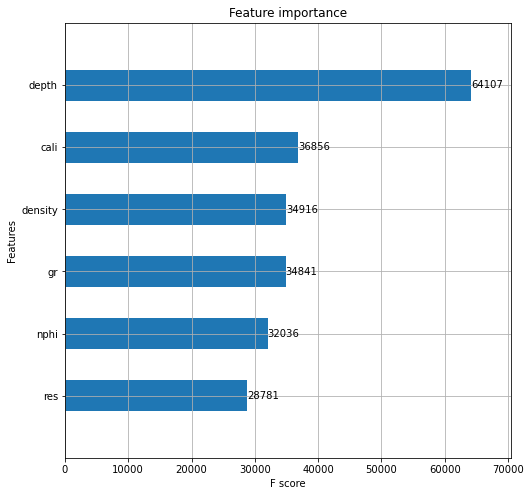

In [63]:
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
fig.savefig('XGB-feature.jpg',bbox_inches='tight')
plt.show()

<h1>Random Forest</h1>

In [34]:

param={'n_estimators':range(100,300,10)}
tree=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=param,iid=False, cv=5,random_state=1234)
tree.fit(trainx,trainy)
predict=tree.predict(testx)
print(np.sqrt(mean_squared_error(predict,testy)))
tree.score(testx,testy)


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

0.18018101019818694


-0.20698796664786734

In [35]:
tree.best_params_

{'n_estimators': 240}

In [36]:
tree=RandomForestRegressor(n_estimators=240,random_state=1234,n_jobs=-1)
tree.fit(trainx,trainy)
predict=tree.predict(testx)
print(np.sqrt(mean_squared_error(predict,testy)))
# tree.score(testx,testy)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.18082517752360597


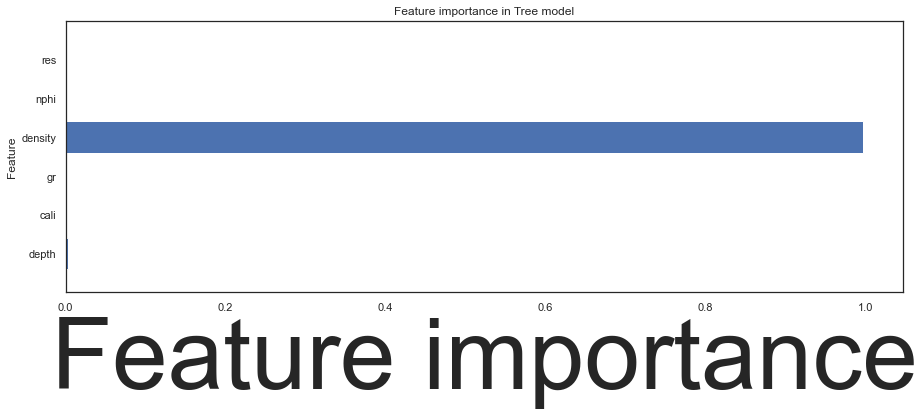

In [98]:
def plot_feature_importances(model,name):
    n_features =trainx.shape[1]
    plt.figure(figsize=(15,5))
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), trainx.columns)
    plt.xlabel("Feature importance", size=100)
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title('Feature importance in Tree model')
    plt.savefig(name+'.jpg',bbox_inches='tight')
features=plot_feature_importances(tree,'feature_importance')

<h1>Creating a dataframe of model prediction</h1>

In [66]:
#model=[Blr,Rlr,Slr,gsearch1,Llr]
dict_model={'Depth':well2a.depth,'Forest':np.expm1(tree.predict(testx)),'Lasso': np.expm1(Llr.predict(testx)),'SGDRegressor':np.expm1(Slr.predict(testx)), 'XGB':np.expm1(preds)}

dict_model=pd.DataFrame(dict_model)
dict_model['Original']=np.expm1(testy['sonic'])
dict_model['Ols']=np.expm1(lr.predict(testx))
dict_model['Ridge']=np.expm1(Rlr.predict(testx))
#dict_model.to_csv('dict_model.csv')
dict_model.to_csv('../data/dict_model_.csv')

In [86]:
dict_model_result={'Forest':np.sqrt(mean_squared_error(tree.predict(testx),testy)),'Lasso': np.sqrt(mean_squared_error(Llr.predict(testx),testy)),
            'SGDRegressor':np.sqrt(mean_squared_error(Slr.predict(testx),testy)), 'XGB':np.sqrt(mean_squared_error(preds,testy)), 
            'Ols':np.sqrt(mean_squared_error(lr.predict(testx),testy)),
            'Ridge':np.sqrt(mean_squared_error(Rlr.predict(testx),testy))
           }

dict_model_result=pd.DataFrame(dict_model_result, index=(0,))
dict_model_result.to_csv('../data/dict_model_result.csv')


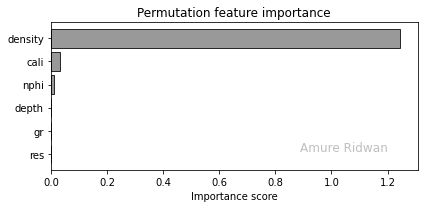

In [153]:
imp = rfpimp.importances(Llr, well3.drop('sonic',axis=1), testy)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'Amure Ridwan', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()
fig.savefig('featureimportance.jpg',bbox_inches='tight')

In [73]:
dict_model=pd.read_csv('../data/dict_model_.csv')

<h1>Plotting the logs</h1>

In [68]:
dict_model.describe()

,Unnamed: 0,Depth,Forest,Lasso,SGDRegressor,XGB,Original,Ols,Ridge
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,8534.627907,9796.313953,101.029882,115.596047,115.997352,105.382967,111.833835,122.713178,119.784245
std,1197.199594,598.599797,0.760763,16.426513,18.341258,4.349737,14.316126,18.923165,18.391407
min,3129.000000,7093.500000,96.388805,67.747557,60.089646,80.740550,55.062500,59.249782,59.074473
25%,8716.000000,9887.000000,101.038826,103.291430,101.096438,103.504290,109.690900,113.189769,106.578045
50%,8791.000000,9924.500000,101.214140,120.239538,122.216918,105.333330,115.280500,126.252306,127.006051
75%,8866.000000,9962.000000,101.346587,129.246963,126.638392,107.079500,120.741800,137.054979,131.735557
max,8941.000000,9999.500000,101.961919,139.489347,163.682903,114.457756,125.890500,148.887123,155.009770


In [69]:
def mpwell(tracks, title=None, mindepth=None, maxdepth=None, tagged_depths=None):
    """Create a well log using matplotlib.
       tracks: list of tracks. Each track is a dictionary with a 'traces'
       key (required), and possibly keys that describe the scale (log or linear)
       and appearance of the track. The 'traces' key points to a list of traces.
       Each trace is a dictionary containing a 'data' key that points to a Pandas
       DataFrame that contains the data to be plotted. The DataFrame must have
       a column named 'depth' that contains the depth in the desired units, and 
       also a column named the same as value of the 'curve' key in the trace. The
       trace dictionary may also have a 'label' key that provides the log mnemonic 
       for the trace, and additional keys that describe the appearance of the trace.
       title: Display title for the log.
       mindepth: minimum depth to be plotted. Optional. Determined from the first trace
       of the first track, if not specified.
       maxdepth: maximum depth to be plotted. Optional. Determined from the first trace
       of the first track, if not specified.
       tagged_depths: List of depths which should be marked on the logs with a horizontal
       line.
    """
    sns.set(rc={"figure.figsize": (40, 20)})
    sns.set_style("white")
    majorLocator = MultipleLocator(50) #50
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(10) #10
    f, axs = plt.subplots(nrows=1, ncols=len(tracks), figsize=(14, 16), tight_layout=True,sharey=True)
    #if title:
       # f.suptitle(title, fontsize=22)
    # reserve space at the top and between subplots
    f.subplots_adjust(top=0.99,wspace=0.25)
    first_trace_data = tracks[0]['traces'][0]['data']
    if mindepth is None:
        mindepth = min(first_trace_data['depth'])
    if maxdepth is None:
        maxdepth = max(first_trace_data['depth'])
    # set up each track
    #axs[0].invert_yaxis()
    for i,ax in enumerate(axs):
        ax.set_ylim(mindepth,maxdepth)
        #ax.invert_yaxis()
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        ax.yaxis.set_minor_locator(minorLocator)
        ax.yaxis.set_major_locator(majorLocator)
        ax.yaxis.grid(b=True, which='major', color='k', linestyle='-')
        ax.yaxis.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.5)
        ax.minorticks_on()
       
        
    # plot each trace in each track
    for num_track, track in enumerate(tracks):
        for i, trace in enumerate(track['traces']):
            fill = track.get('fill', trace['fill'])
            color = track.get('color', trace['color'])
            label = trace.get('label', trace['curve'])
            ls = trace.get('ls', '-')
            marker = trace.get('marker', 'None')
            axi = axs[num_track]#.twiny()
            axi.set_ylim(mindepth, maxdepth)
            
            
            axi.set_xlabel(label, color=color, labelpad=5, fontsize=14)
            axi.xaxis.set_ticks_position('top')
            axi.xaxis.set_label_position('top')

            if (fill == 1):
                class_depth(axi,tagged_depths, label, color)
                axi.minorticks_off()
                axi.grid(False)
            
            elif (fill==2):
                axi.plot(tracks[num_track]['traces'][0]['data'], tagged_depths, ls=ls, marker=marker, color=color)
                axi.set_xscale('log')
                axi.spines['top'].set_position(('outward', 5+30*i))
                axi.spines['top'].set_color(color)
                #x_pos_label=[trace['range'][0], '','','','', trace['range'][1]]
                #axi.set_xticks(x_pos)
                #axi.set_xticklabels(x_pos_label, rotation = 0,fontsize=14)
                #axi.invert_yaxis()
                
            
            else:
                axi.plot(tracks[num_track]['traces'][0]['data'], tagged_depths, ls=ls, marker=marker, color=color)
               # axi.set_xlim(*trace['range'])
                axi.spines['top'].set_position(('outward', 5+30*i))
                axi.spines['top'].set_color(color)
                axi.xaxis.set_ticks(trace['range'])
                axi.tick_params(axis='x', colors=color, length=0)
                #plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                extent= (trace['range'][1] - trace['range'][0])/5
                extent1= extent/3
                majorLocator1 = MultipleLocator(extent)
                minorLocator1 = MultipleLocator(extent1)
                axi.xaxis.set_major_locator(majorLocator1)
                axi.xaxis.set_minor_locator(minorLocator1)
                axi.xaxis.grid(b=True, which='major', color='k', linestyle='-')
                axi.xaxis.grid(b=True, which='minor', color='r', linestyle='-.', alpha=0.2)
                x_pos=[trace['range'][0],trace['range'][0]+extent, trace['range'][0]+2*extent,\
                       trace['range'][0]+3*extent,trace['range'][0]+4*extent,trace['range'][1]]
                x_pos_label=[trace['range'][0], '','','','', trace['range'][1]]
                axi.set_xticks(x_pos)
                axi.set_xticklabels(x_pos_label, rotation = 0,fontsize=14)
                #axi.invert_yaxis()
                
                
            if 'xref' in trace:
                axi.axvline(trace['xref'], color='k', linestyle='--')
           
            
        axs[0].set_ylim(ax.get_ylim()[::-1])    
        axs[0].set_ylabel('Depth (ft)',fontsize=20)
    return f

In [71]:
dict_model=dict_model[dict_model.Depth<7100]
dict_model.describe()

,Unnamed: 0,Depth,Forest,Lasso,SGDRegressor,XGB,Original,Ols,Ridge
count,13.00000,13.00000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000
mean,3135.00000,7096.50000,98.149836,67.900798,63.239628,95.755746,5.506250e+01,59.932815,61.527613
std,3.89444,1.94722,0.981418,0.048414,0.995048,0.843081,1.479113e-14,0.253273,0.776902
min,3129.00000,7093.50000,96.388805,67.747557,60.089646,94.164536,5.506250e+01,59.249782,59.074473
25%,3132.00000,7095.00000,97.819311,67.897256,63.298645,95.236130,5.506250e+01,59.881610,61.589702
50%,3135.00000,7096.50000,98.424410,67.911564,63.560008,95.483240,5.506250e+01,60.022850,61.805965
75%,3138.00000,7098.00000,98.555002,67.924326,63.744109,96.395935,5.506250e+01,60.070916,61.906155
max,3141.00000,7099.50000,100.006678,67.932523,63.844907,97.033850,5.506250e+01,60.158472,61.991389


In [78]:
dict_model_=dict_model[dict_model.Depth>8000]

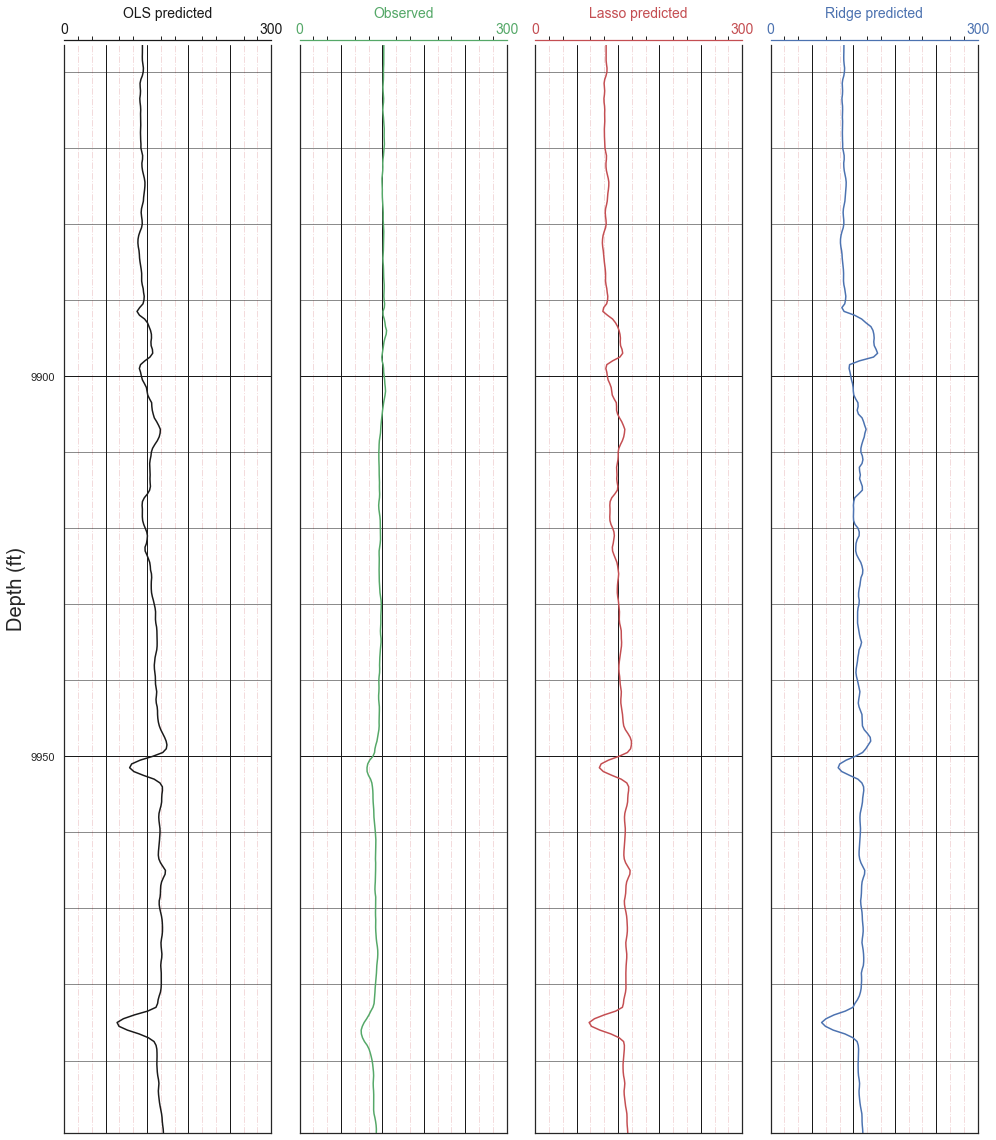

In [99]:

trace11 = {'data': dict_model_.Ols, 'curve': 'OLS predicted', 'color': 'k', 'fill':0,'range': (0, 300)}
track1 = {'traces': [trace11]}
trace21 = {'data':  dict_model_.Original, 'curve': 'Observed', 'color': 'g', 'fill':0,'range': (0, 300)}
track2 = {'traces': [trace21]}


trace31 = {'data':  dict_model_.Lasso, 'curve': 'Lasso predicted', 'color': 'r','fill':0,'range': (0,300)}    
track3 = {'traces': [trace31]}
trace41 = {'data':  dict_model_.Ridge, 'curve': 'Ridge predicted', 'color': 'b', 'fill':0,'range': (0, 300)}
track4 = {'traces': [trace41]}

tracks = [track1, track2, track3,track4]


xrd_depths = dict_model_['Depth']
log = mpwell(tracks, 'My well', min(xrd_depths), max(xrd_depths), dict_model_['Depth'].values )

In [100]:
log.savefig('Sonicplots2.jpg',bbox_inches='tight')